(a) Manual Bilateral Filter

In [1]:
import numpy as np

def bilateral_filter_manual(img, diameter, sigma_s, sigma_r):
    """
    Manual bilateral filter for grayscale images
    """
    pad = diameter // 2
    img = img.astype(np.float32)
    padded = np.pad(img, pad, mode='reflect')

    h, w = img.shape
    filtered = np.zeros_like(img)

    # Precompute spatial Gaussian
    x, y = np.meshgrid(np.arange(-pad, pad+1), np.arange(-pad, pad+1))
    spatial_gaussian = np.exp(-(x**2 + y**2) / (2 * sigma_s**2))

    for i in range(h):
        for j in range(w):
            region = padded[i:i+diameter, j:j+diameter]

            intensity_diff = region - img[i, j]
            range_gaussian = np.exp(-(intensity_diff**2) / (2 * sigma_r**2))

            weights = spatial_gaussian * range_gaussian
            filtered[i, j] = np.sum(weights * region) / np.sum(weights)

    return np.uint8(filtered)


Step 2: Load Test Image (Used for b, c, d)

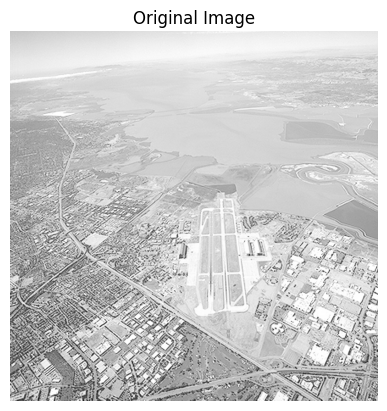

In [2]:
import cv2
import matplotlib.pyplot as plt

image_path = "../data/original/runway.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Image not found")

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

(b) Gaussian Smoothing (OpenCV)

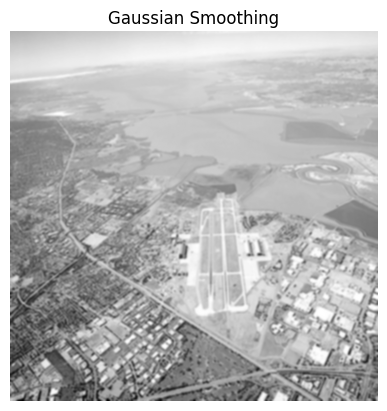

In [3]:
gaussian = cv2.GaussianBlur(img, (9,9), sigmaX=2)

plt.imshow(gaussian, cmap='gray')
plt.title("Gaussian Smoothing")
plt.axis("off")
plt.show()


(c) Bilateral Filtering using OpenCV

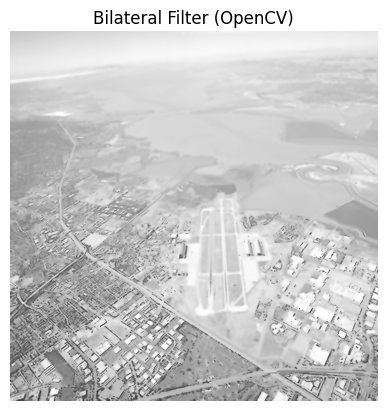

In [4]:
bilateral_cv = cv2.bilateralFilter(
    img,
    d=9,
    sigmaColor=50,
    sigmaSpace=50
)

plt.imshow(bilateral_cv, cmap='gray')
plt.title("Bilateral Filter (OpenCV)")
plt.axis("off")
plt.show()


(d) Apply Your Manual Bilateral Filter

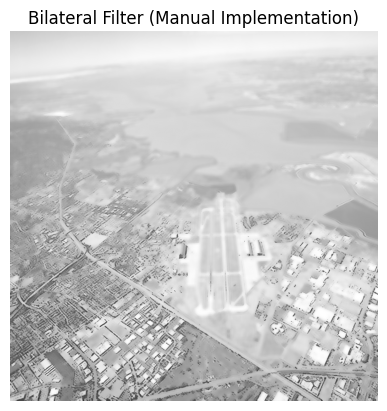

In [5]:
bilateral_manual = bilateral_filter_manual(
    img,
    diameter=9,
    sigma_s=50,
    sigma_r=50
)

plt.imshow(bilateral_manual, cmap='gray')
plt.title("Bilateral Filter (Manual Implementation)")
plt.axis("off")
plt.show()
